Step: Data Loading Setup

This part prepares for data loading by listing the dataset files and checking the file path.

It does not yet load the data, but sets up the groundwork for it.

In [6]:
import pandas as pd
import os
print(os.getcwd())



# List of CSV files to merge
data_files = [
    'UNSW-NB15_1.csv',
    'UNSW-NB15_2.csv',
    'UNSW-NB15_3.csv',
    'UNSW-NB15_4.csv'
]


d:\ONGC_ML


Step: Data Loading

This block actually performs the loading of raw CSV files and merges them into a single dataset for further processing.

In [7]:
# data_folder_path = "c:\\Users\\HP\\Downloads"
# Read each file without headers
dataframes = [pd.read_csv(file, header=None, low_memory=False) for file in data_files]

# Concatenate all dataframes vertically
merged_df = pd.concat(dataframes, ignore_index=True)

# Check shape
print("Merged Data Shape:", merged_df.shape)


Merged Data Shape: (2540047, 49)


 Step: Data Preprocessing – Labeling Columns

This code transitions from raw loading to data preprocessing.

Specifically, it assigns meaningful column names to the dataset, which is crucial for later steps like cleaning, analysis, and model training.

In [8]:
# Attempt to read the features file using ISO-8859-1 (Latin-1) encoding
features_df = pd.read_csv("NUSW-NB15_features.csv", encoding='ISO-8859-1')

# Extract the feature names (2nd column)
feature_names = features_df.iloc[:, 1].tolist()

# Assign these to your merged_df
merged_df.columns = feature_names

# Optional: check the result
print(merged_df.columns.tolist())
print(merged_df.head())

['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat', 'Label']
        srcip  sport          dstip dsport proto state       dur  sbytes  \
0  59.166.0.0   1390  149.171.126.6     53   udp   CON  0.001055     132   
1  59.166.0.0  33661  149.171.126.9   1024   udp   CON  0.036133     528   
2  59.166.0.6   1464  149.171.126.7     53   udp   CON  0.001119     146   
3  59.166.0.5   3593  149.171.126.5     53   udp   CON  0.001209     132   
4  59.166.0.3  49664  149.171.126.0     53   udp   CON  0.001

Step: Exploratory Data Analysis (EDA)

This is part of EDA or data inspection.

You're using .describe() to understand the distribution and spread of the features, which can guide preprocessing decisions like normalization or outlier handling.



In [9]:
print(merged_df.describe())

                dur        sbytes        dbytes          sttl          dttl  \
count  2.540047e+06  2.540047e+06  2.540047e+06  2.540047e+06  2.540047e+06   
mean   6.587916e-01  4.339600e+03  3.642759e+04  6.278197e+01  3.076681e+01   
std    1.392493e+01  5.640599e+04  1.610960e+05  7.462277e+01  4.285089e+01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.037000e-03  2.000000e+02  1.780000e+02  3.100000e+01  2.900000e+01   
50%    1.586100e-02  1.470000e+03  1.820000e+03  3.100000e+01  2.900000e+01   
75%    2.145545e-01  3.182000e+03  1.489400e+04  3.100000e+01  2.900000e+01   
max    8.786638e+03  1.435577e+07  1.465753e+07  2.550000e+02  2.540000e+02   

              sloss         dloss         Sload         Dload         Spkts  \
count  2.540047e+06  2.540047e+06  2.540047e+06  2.540047e+06  2.540047e+06   
mean   5.163921e+00  1.632944e+01  3.695645e+07  2.450861e+06  3.328884e+01   
std    2.251707e+01  5.659474e+01  1.186043e+08  4.

In [10]:
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540047 entries, 0 to 2540046
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             object 
 2   dstip             object 
 3   dsport            object 
 4   proto             object 
 5   state             object 
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           object 
 14  Sload             float64
 15  Dload             float64
 16  Spkts             int64  
 17  Dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26  Sjit          

In [11]:
# Filter only columns with null values and print
null_counts = merged_df.isnull().sum()
null_columns = null_counts[null_counts > 0]

print("Columns with missing values:")
print(null_columns)


Columns with missing values:
ct_flw_http_mthd    1348145
is_ftp_login        1429879
attack_cat          2218764
dtype: int64


In [12]:
merged_df = merged_df.drop(columns=['attack_cat'])


In [13]:
# Filter only columns with null values and print
null_counts = merged_df.isnull().sum()
null_columns = null_counts[null_counts > 0]

print("Columns with missing values:")
print(null_columns)

Columns with missing values:
ct_flw_http_mthd    1348145
is_ftp_login        1429879
dtype: int64


In [14]:
print(merged_df.columns)


Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes',
       'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload',
       'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime',
       'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'Label'],
      dtype='object')


In [15]:
cols_to_drop = ['ct_flw_http_mthd', 'is_ftp_login']
merged_df = merged_df.drop(columns=cols_to_drop)


In [16]:
print(merged_df.isnull().sum())


srcip               0
sport               0
dstip               0
dsport              0
proto               0
state               0
dur                 0
sbytes              0
dbytes              0
sttl                0
dttl                0
sloss               0
dloss               0
service             0
Sload               0
Dload               0
Spkts               0
Dpkts               0
swin                0
dwin                0
stcpb               0
dtcpb               0
smeansz             0
dmeansz             0
trans_depth         0
res_bdy_len         0
Sjit                0
Djit                0
Stime               0
Ltime               0
Sintpkt             0
Dintpkt             0
tcprtt              0
synack              0
ackdat              0
is_sm_ips_ports     0
ct_state_ttl        0
ct_ftp_cmd          0
ct_srv_src          0
ct_srv_dst          0
ct_dst_ltm          0
ct_src_ ltm         0
ct_src_dport_ltm    0
ct_dst_sport_ltm    0
ct_dst_src_ltm      0
Label     

In [17]:
# Count how many duplicate rows exist
num_duplicates = merged_df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")


Number of duplicate rows: 491430


In [18]:
print(merged_df.shape)

(2540047, 46)


In [19]:
merged_df = merged_df.drop_duplicates()


In [20]:
print(merged_df.shape)


(2048617, 46)


In [21]:
print(merged_df['Label'].value_counts())


Label
0    1959772
1      88845
Name: count, dtype: int64


 Data Preprocessing – Feature Selection / Dimensionality Reduction

You're removing highly correlated (redundant) features to:

Avoid multicollinearity

Reduce overfitting risk

Improve model performance and training time

This is a very crucial step in preparing high-quality input for machine learning.

In [22]:
import numpy as np # Import numpy if not already done

# Select only numeric columns for correlation analysis (excluding Label for now)
numerical_cols_for_corr = merged_df.select_dtypes(include=np.number).columns.tolist()
if 'Label' in numerical_cols_for_corr:
    numerical_cols_for_corr.remove('Label')

corr_matrix_numeric = merged_df[numerical_cols_for_corr].corr().abs()

# Select upper triangle of correlation matrix to avoid duplicate pairs
upper = corr_matrix_numeric.where(np.triu(np.ones(corr_matrix_numeric.shape), k=1).astype(bool))

# Find features with correlation greater than a threshold
threshold = 0.95
highly_correlated_pairs_info = []
to_drop_based_on_intercorrelation = set()

for column in upper.columns:
    for row_index in upper.index:
        correlation_value = upper.loc[row_index, column]
        if correlation_value > threshold:
            highly_correlated_pairs_info.append(((row_index, column), correlation_value))

print(f"Highly correlated feature pairs (threshold > {threshold}):")
for pair_info in sorted(highly_correlated_pairs_info, key=lambda x: x[1], reverse=True):
    pair, corr_val = pair_info
    print(f"{pair[0]} and {pair[1]} : {corr_val:.4f}")

    # Simple heuristic: if neither is already in to_drop, add the second one.
    # More advanced: check correlation with target or variance.
    if pair[0] not in to_drop_based_on_intercorrelation and pair[1] not in to_drop_based_on_intercorrelation:
        # For now, let's just list them. We'll decide which to drop more carefully.
        pass


# Specific known highly correlated groups to refine dropping strategy:
# 1. Stime, Ltime, dur: 'dur' is Ltime - Stime. If 'dur' is present, 'Stime' and 'Ltime' are redundant.
if 'dur' in merged_df.columns and 'Stime' in merged_df.columns and 'Ltime' in merged_df.columns:
    print("\n'dur' is present. 'Stime' and 'Ltime' are likely redundant.")
    to_drop_based_on_intercorrelation.add('Stime')
    to_drop_based_on_intercorrelation.add('Ltime')

# 2. sbytes, sloss (Source traffic volume vs. source loss)
#    dbytes, dloss, Dpkts (Destination traffic volume, loss, packets)
#    Let's assume we keep sbytes and dbytes as primary volume indicators and drop related loss/packet counts if highly correlated.
if ('sbytes', 'sloss') in [p[0] for p in highly_correlated_pairs_info if p[1] > threshold] or \
   ('sloss', 'sbytes') in [p[0] for p in highly_correlated_pairs_info if p[1] > threshold]:
    to_drop_based_on_intercorrelation.add('sloss')

dest_corr_candidates = {'dloss', 'Dpkts'}
for col in dest_corr_candidates:
    if ('dbytes', col) in [p[0] for p in highly_correlated_pairs_info if p[1] > threshold] or \
       (col, 'dbytes') in [p[0] for p in highly_correlated_pairs_info if p[1] > threshold]:
        to_drop_based_on_intercorrelation.add(col)

# 3. swin, dwin (Source and Destination window size)
if ('swin', 'dwin') in [p[0] for p in highly_correlated_pairs_info if p[1] > threshold] or \
   ('dwin', 'swin') in [p[0] for p in highly_correlated_pairs_info if p[1] > threshold]:
    to_drop_based_on_intercorrelation.add('dwin') # Arbitrarily drop destination window

# 4. tcprtt, synack, ackdat (TCP round trip time components)
tcp_timing_group = {'tcprtt', 'synack', 'ackdat'}
# If tcprtt is highly correlated with the others, keep tcprtt and drop others.
if 'tcprtt' in tcp_timing_group:
    for col in ['synack', 'ackdat']:
        if col in tcp_timing_group and \
           (('tcprtt', col) in [p[0] for p in highly_correlated_pairs_info if p[1] > threshold] or \
            (col, 'tcprtt') in [p[0] for p in highly_correlated_pairs_info if p[1] > threshold]):
            to_drop_based_on_intercorrelation.add(col)


print(f"\nRefined features to consider dropping due to high correlation: {list(to_drop_based_on_intercorrelation)}")

# Actually drop these columns
merged_df.drop(columns=list(to_drop_based_on_intercorrelation), inplace=True, errors='ignore')
print(f"\nShape after dropping highly correlated numerical features: {merged_df.shape}")

# Update numerical_cols list
numerical_cols = merged_df.select_dtypes(include=np.number).columns.tolist()
if 'Label' in numerical_cols:
    numerical_cols.remove('Label')

Highly correlated feature pairs (threshold > 0.95):
Stime and Ltime : 1.0000
swin and dwin : 0.9964
dloss and Dpkts : 0.9922
dbytes and dloss : 0.9916
dbytes and Dpkts : 0.9717
sbytes and sloss : 0.9596

'dur' is present. 'Stime' and 'Ltime' are likely redundant.

Refined features to consider dropping due to high correlation: ['dwin', 'Dpkts', 'Stime', 'dloss', 'sloss', 'Ltime']

Shape after dropping highly correlated numerical features: (2048617, 40)


Exploratory Data Analysis (EDA) – Target Correlation Analysis

You're identifying which features are most relevant to the target (important for feature selection).

Also includes data visualization to communicate insight visually.




Correlation of remaining numerical features with Target (Label):

sttl                0.742491
ct_state_ttl        0.653744
dttl                0.569747
tcprtt              0.301295
ackdat              0.295880
synack              0.262350
ct_dst_sport_ltm    0.244190
ct_dst_src_ltm      0.242089
ct_src_dport_ltm    0.216405
Sload               0.196299
ct_srv_src          0.107727
ct_srv_dst          0.105270
ct_src_ ltm         0.070399
ct_dst_ltm          0.066385
Sjit                0.064869
smeansz             0.062548
trans_depth         0.054066
sbytes              0.049516
dur                 0.011059
Dintpkt             0.004588
Sintpkt            -0.004398
is_sm_ips_ports    -0.007793
res_bdy_len        -0.009590
Djit               -0.013687
stcpb              -0.031403
dtcpb              -0.031512
dbytes             -0.033807
Spkts              -0.038070
swin               -0.046885
dmeansz            -0.131906
Dload              -0.139050
Name: Label, dtype: float64


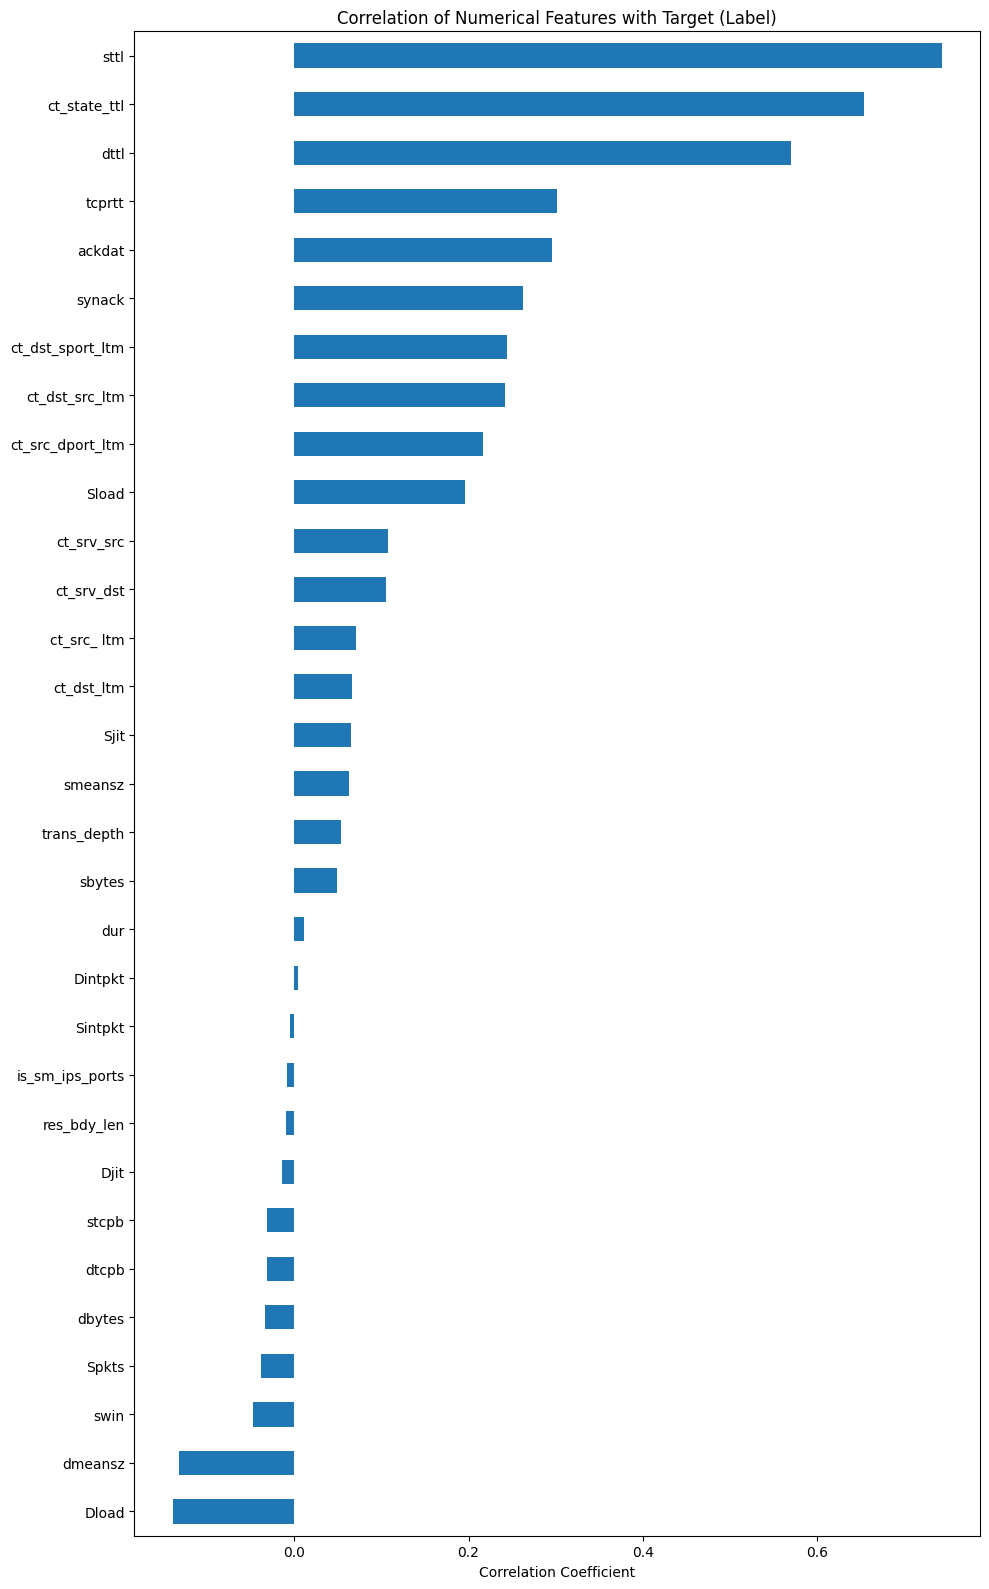

In [23]:
# Recalculate correlation with 'Label' for the remaining numerical features
import matplotlib.pyplot as plt 
if 'Label' in merged_df.columns and pd.api.types.is_numeric_dtype(merged_df['Label']):
    # Ensure 'Label' is included for correlation calculation, then removed from the series for plotting
    cols_for_target_corr = numerical_cols + ['Label']
    if not all(col in merged_df.columns for col in cols_for_target_corr):
        # Re-fetch numerical columns if list is stale
        temp_numerical_cols = merged_df.select_dtypes(include=np.number).columns.tolist()
        cols_for_target_corr = [col for col in temp_numerical_cols if col in merged_df.columns]


    target_correlations = merged_df[cols_for_target_corr].corr()['Label'].sort_values(ascending=False)
    print("\nCorrelation of remaining numerical features with Target (Label):\n")
    print(target_correlations.drop('Label')) # Exclude Label's correlation with itself

    # Visualize
    plt.figure(figsize=(10, max(6, len(target_correlations) // 2))) # Adjust height based on number of features
    target_correlations.drop('Label').sort_values().plot(kind='barh')
    plt.title('Correlation of Numerical Features with Target (Label)')
    plt.xlabel('Correlation Coefficient')
    plt.tight_layout()
    plt.show()
else:
    print("Label column not found or is not numeric. Skipping target correlation.")

 Data Preprocessing – Final Cleaning & Data Type Fixes

Specifically:

Data Type Handling (object → numeric)

Missing Value Imputation

Feature Type Identification (categorical vs numerical)

Dropping Unnecessary Columns (like IPs)    as per told by sir to drop numeric colums for more accuracy

<!-- This is the last preparation step before encoding, scaling, and splitting the dataset for training. -->

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set some display options for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set plot style
plt.style.use('ggplot')


print("Current DataFrame shape:", merged_df.shape)
print("\nData types before final object column handling:")
print(merged_df.dtypes.value_counts())


# Convert sport and dsport to numeric, coercing errors
# These might still be objects if previous conversions didn't happen or if new data was loaded
for col_name in ['sport', 'dsport']:
    if col_name in merged_df.columns and merged_df[col_name].dtype == 'object':
        print(f"\nConverting {col_name} to numeric...")
        merged_df[col_name] = pd.to_numeric(merged_df[col_name], errors='coerce')
        print(f"NaNs in {col_name} after to_numeric: {merged_df[col_name].isnull().sum()}")
        # Fill NaNs (e.g., with 0 for ports or a specific placeholder if meaningful)
        merged_df[col_name].fillna(0, inplace=True)
        merged_df[col_name] = merged_df[col_name].astype(int)
        print(f"{col_name} dtype after conversion: {merged_df[col_name].dtype}")

# Ensure ct_ftp_cmd is numeric
if 'ct_ftp_cmd' in merged_df.columns:
    if merged_df['ct_ftp_cmd'].dtype == 'object':
        print("\nConverting ct_ftp_cmd to numeric...")
        merged_df['ct_ftp_cmd'] = pd.to_numeric(merged_df['ct_ftp_cmd'], errors='coerce').fillna(0).astype(int)
        print(f"ct_ftp_cmd dtype after conversion: {merged_df['ct_ftp_cmd'].dtype}")
    elif not pd.api.types.is_numeric_dtype(merged_df['ct_ftp_cmd']):
         merged_df['ct_ftp_cmd'] = merged_df['ct_ftp_cmd'].astype(int) # If already numeric but not int

# Drop IP addresses if they are still present (they should have been dropped in previous steps)
cols_to_drop_ips = ['srcip', 'dstip']
ips_present = [col for col in cols_to_drop_ips if col in merged_df.columns]
if ips_present:
    print(f"\nDropping IP columns: {ips_present}")
    merged_df.drop(columns=ips_present, inplace=True, errors='ignore')
    print(f"Shape after dropping IP columns: {merged_df.shape}")

# Rename 'ct_src_ ltm' if it exists
if 'ct_src_ ltm' in merged_df.columns:
    merged_df.rename(columns={'ct_src_ ltm': 'ct_src_ltm'}, inplace=True)
    print("Renamed 'ct_src_ ltm' to 'ct_src_ltm'")

# Identify remaining categorical and numerical columns
categorical_cols_final = merged_df.select_dtypes(include='object').columns.tolist()
numerical_cols_final = merged_df.select_dtypes(include=np.number).columns.tolist()
if 'Label' in numerical_cols_final:
    numerical_cols_final.remove('Label') # Exclude target from features

print(f"\nFinal Categorical columns for encoding: {categorical_cols_final}")
print(f"Final Numerical columns for scaling: {numerical_cols_final}")

print("\nData types after final object column handling:")
print(merged_df.dtypes.value_counts())
print("\nNull values check after handling object columns (top 5):")
print(merged_df.isnull().sum().sort_values(ascending=False).head())
if merged_df.isnull().sum().sum() == 0:
    print("No missing values remaining.")
else:
    print("There are still missing values to handle!")

print("\nFinal DataFrame shape before train-test split:", merged_df.shape)

Current DataFrame shape: (2048617, 40)

Data types before final object column handling:
int64      22
float64    10
object      8
Name: count, dtype: int64

Converting sport to numeric...
NaNs in sport after to_numeric: 8
sport dtype after conversion: int64

Converting dsport to numeric...


C:\Users\HP\AppData\Local\Temp\ipykernel_906076\963149168.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df[col_name].fillna(0, inplace=True)


NaNs in dsport after to_numeric: 295
dsport dtype after conversion: int64

Converting ct_ftp_cmd to numeric...


C:\Users\HP\AppData\Local\Temp\ipykernel_906076\963149168.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df[col_name].fillna(0, inplace=True)


ct_ftp_cmd dtype after conversion: int64

Dropping IP columns: ['srcip', 'dstip']
Shape after dropping IP columns: (2048617, 38)
Renamed 'ct_src_ ltm' to 'ct_src_ltm'

Final Categorical columns for encoding: ['proto', 'state', 'service']
Final Numerical columns for scaling: ['sport', 'dsport', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'Sload', 'Dload', 'Spkts', 'swin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm']

Data types after final object column handling:
int64      25
float64    10
object      3
Name: count, dtype: int64

Null values check after handling object columns (top 5):
sport     0
dsport    0
proto     0
state     0
dur       0
dtype: int64
No missing values remaining.

Final DataFrame shape before train-test split: (2

 Log Transformation to Reduce Skewness – Key Steps
Objective: Reduce skewness in numerical features to improve model performance by normalizing their distribution.

Reasoning:

Based on EDA and histogram plots, several features showed strong right-skewed distributions.

Skewed data can negatively impact the performance of models that assume normally distributed features.

Features Targeted:

Included dur, sbytes, dbytes, Sload, Dload, and count-based features like ct_srv_src.

Transformation Applied:

Used np.log1p(x) (i.e., log(1 + x)) which is effective even when values are 0.

This technique helps stabilize variance and reduce skewness.

Implementation Steps:

Filtered out only the relevant columns that exist in the dataset.

Applied the log1p transformation to each selected feature.

Visualization:

Plotted a grid of histograms (up to 9 plots per figure) to visualize the effect.

Post-transformation histograms showed distributions closer to normal (more symmetric).

Conclusion:

This transformation is part of the data preprocessing pipeline.

Specifically falls under feature transformation and normalization steps before modeling.




Applying log1p transformation to: ['dur', 'sbytes', 'dbytes', 'Sload', 'Dload', 'Spkts', 'smeansz', 'dmeansz', 'res_bdy_len', 'Sjit', 'Djit', 'Sintpkt', 'Dintpkt', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm']

Data description after log transformation (sample):
                dur        sbytes        dbytes         Sload         Dload  \
count  2.048617e+06  2.048617e+06  2.048617e+06  2.048617e+06  2.048617e+06   
mean   2.450897e-01  7.258356e+00  7.864098e+00  1.268426e+01  1.287692e+01   
std    4.800315e-01  1.568011e+00  2.704068e+00  2.301730e+00  3.323679e+00   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    3.912337e-03  6.052089e+00  5.720312e+00  1.129287e+01  1.124352e+01   
50%    2.649392e-02  7.429521e+00  8.033009e+00  1.319923e+01  1.341568e+01   
75%    2.903273e-01  8.223895e+00  9.909321e+00  1.389288e+01  1.516330e+01   
max    9.081101e+00  1.647966e+01  1

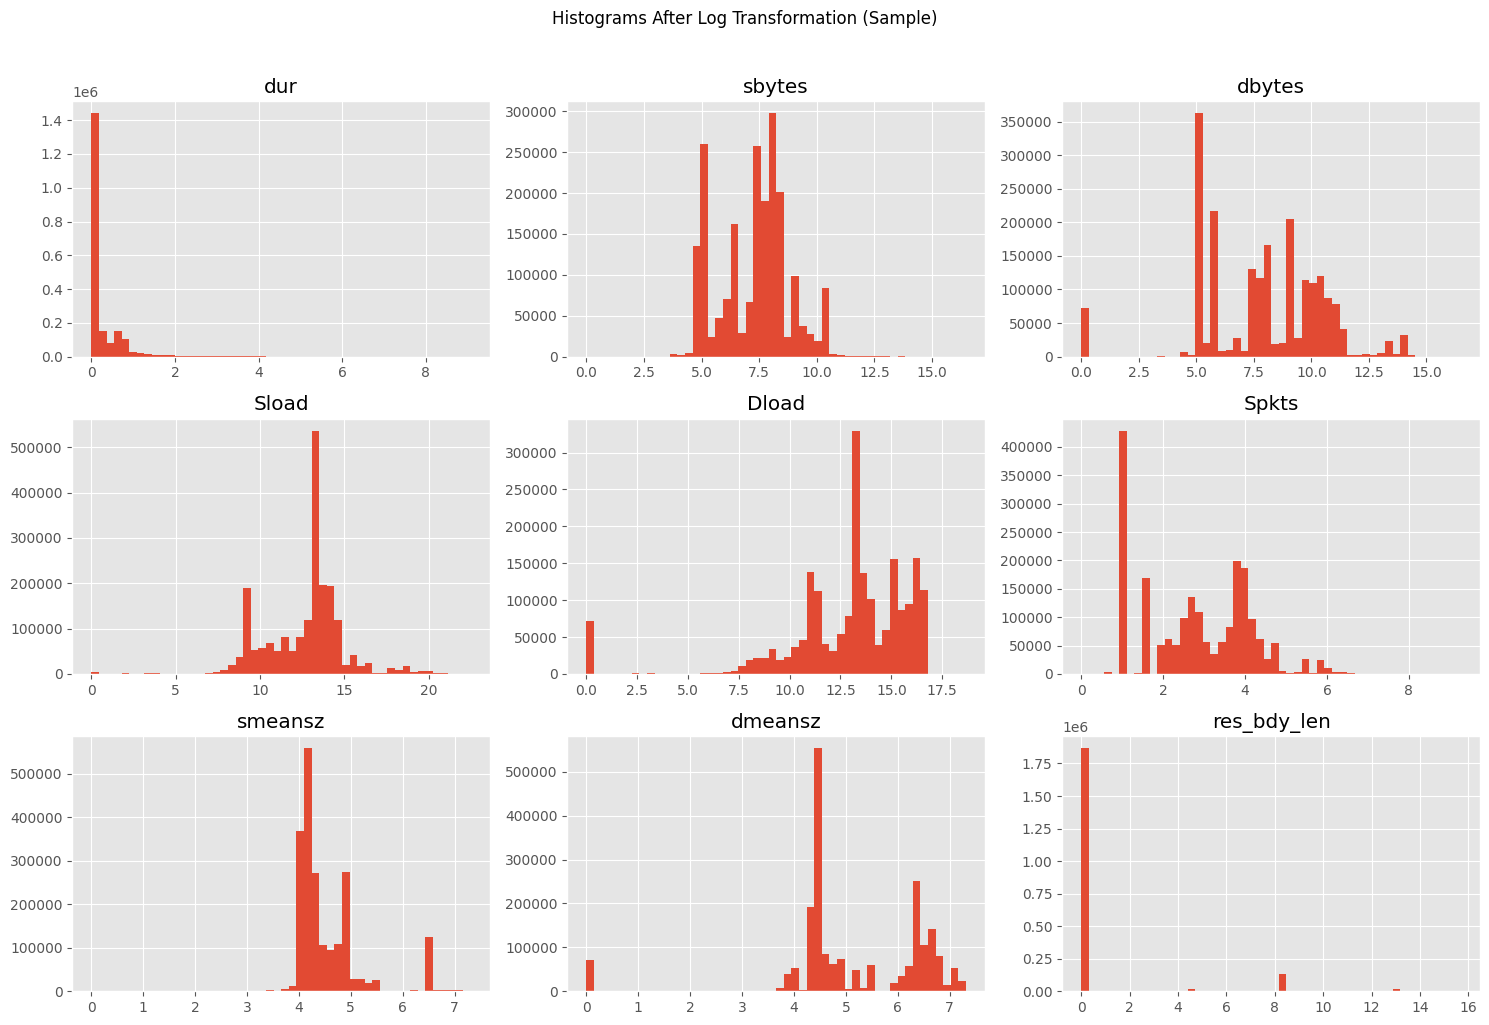

In [25]:
# Log transform skewed numerical features (select a subset or all as appropriate)
# Identify features that might benefit from log transformation based on EDA (histograms)
# For example: 'dur', 'sbytes', 'dbytes', 'Sload', 'Dload', 'Spkts', 'Sjit', 'Djit', 'Sintpkt', 'Dintpkt'
# and count-based features like 'ct_srv_src', etc.

cols_for_log_transform = [
    'dur', 'sbytes', 'dbytes', 'Sload', 'Dload', 'Spkts',
    'smeansz', 'dmeansz', 'res_bdy_len', 'Sjit', 'Djit',
    'Sintpkt', 'Dintpkt',
    'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm',
    'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm'
]

# Ensure columns exist in the dataframe before attempting transformation
cols_to_transform_present = [col for col in cols_for_log_transform if col in merged_df.columns]

print(f"\nApplying log1p transformation to: {cols_to_transform_present}")
for col in cols_to_transform_present:
    merged_df[col] = np.log1p(merged_df[col]) # log1p handles 0s by calculating log(1+x)

print("\nData description after log transformation (sample):")
print(merged_df[cols_to_transform_present].describe())

# Visualize distributions of some transformed features
if cols_to_transform_present:
    merged_df[cols_to_transform_present[:min(9, len(cols_to_transform_present))]].hist(figsize=(15, 10), bins=50)
    plt.suptitle('Histograms After Log Transformation (Sample)', y=1.02)
    plt.tight_layout()
    plt.show()

In [ ]:
# ==============================================================================
# Model Training and Evaluation (Without SMOTE) + Saving Best Model as .pkl
# ==============================================================================
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score, roc_auc_score
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import joblib
import os
import json

# -----------------------------
# Load or simulate data
# -----------------------------
# Replace this with your actual dataset loading
data = pd.read_csv("merged_df.csv")  # Make sure this file exists with the correct format

# -----------------------------
# Column definitions
# -----------------------------
cols_for_log_transform = [
    'dur', 'sbytes', 'dbytes', 'Sload', 'Dload', 'Spkts',
    'smeansz', 'dmeansz', 'res_bdy_len', 'Sjit', 'Djit',
    'Sintpkt', 'Dintpkt',
    'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm',
    'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm'
]
cat_features = ['proto']
target_column = 'attack'

# -----------------------------
# Log transformation
# -----------------------------
for col in cols_for_log_transform:
    if col in data.columns:
        data[col] = np.log1p(data[col])

# -----------------------------
# Split features and target
# -----------------------------
X = data.drop(columns=target_column)
y = data[target_column]

# -----------------------------
# Train/test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------
# Preprocessing
# -----------------------------
num_features = [col for col in X.columns if col not in cat_features]
preprocessor_cat = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
scaler = StandardScaler()

preprocessor = ColumnTransformer([
    ('num', scaler, num_features),
    ('cat', preprocessor_cat, cat_features)
])

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# -----------------------------
# Model training: Random Forest
# -----------------------------
rf_clf_imbalanced = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)
rf_clf_imbalanced.fit(X_train_processed, y_train)

# -----------------------------
# Evaluation
# -----------------------------
y_pred = rf_clf_imbalanced.predict(X_test_processed)
y_pred_proba = rf_clf_imbalanced.predict_proba(X_test_processed)[:, 1]

print("\n--- Evaluation Metrics ---")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Benign (0)', 'Attack (1)']))
print(f"F1-score (Attack): {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")

# -----------------------------
# Save model and preprocessing
# -----------------------------
os.makedirs("model_artifacts", exist_ok=True)
joblib.dump(rf_clf_imbalanced, "model_artifacts/rf_model_no_smote.pkl")
joblib.dump(scaler, "model_artifacts/scaler.pkl")
joblib.dump(preprocessor_cat, "model_artifacts/ohe_preprocessor.pkl")
with open("model_artifacts/top_features.json", "w") as f:
    json.dump(list(X.columns), f)

print("✅ Model and preprocessing artifacts saved in 'model_artifacts/' folder.")


TRAIN - TEST  SPLIT

 Train-Test Split and Feature Analysis 
📤 Splitting the Dataset
The dataset is divided into two parts:

1.Features (X): All columns except the target label (Label).

2.Target (y): The Label column, which indicates whether the traffic is normal or an attack.

🔀 Train-Test Division
The data is split using train_test_split with the following settings:

test_size=0.3: 30% of the data is used for testing; 70% is used for training.

random_state=42: Ensures reproducibility by setting a fixed seed.

stratify=y: Ensures the class distribution (normal vs. attack) remains balanced across both training and testing sets, which is especially important in imbalanced datasets.

📊 Shape Verification
The shapes of the resulting splits are printed:

X_train, X_test: Number of records and features in training and test sets.

y_train, y_test: Number of target labels in training and test sets.

⚖️ Class Distribution Check
The proportion of each class in both y_train and y_test is printed:

This confirms that stratify=y has maintained the same ratio of normal and attack labels across the splits.

📌 Column Type Analysis (for Preprocessing)
After the split, columns in X_train are categorized:

categorical_cols_final: List of columns with object data types (to be encoded).

numerical_cols_final: List of columns with numeric data types (to be scaled).

The target Label is excluded from the numerical feature list.

✅ Output Summary
The final lists of categorical and numerical columns are printed, which will be essential for the next preprocessing steps like encoding and feature scaling.

In [26]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = merged_df.drop('Label', axis=1)
y = merged_df['Label']

# Perform train-test split
# Stratify by y to ensure similar class proportions in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

print("\nProportion of labels in y_train:")
print(y_train.value_counts(normalize=True))
print("\nProportion of labels in y_test:")
print(y_test.value_counts(normalize=True))

# Update lists of categorical and numerical columns based on X_train
categorical_cols_final = X_train.select_dtypes(include='object').columns.tolist()
numerical_cols_final = X_train.select_dtypes(include=np.number).columns.tolist()

print(f"\nCategorical columns for encoding (from X_train): {categorical_cols_final}")
print(f"Numerical columns for scaling (from X_train): {numerical_cols_final}")

Shape of X_train: (1434031, 37)
Shape of X_test: (614586, 37)
Shape of y_train: (1434031,)
Shape of y_test: (614586,)

Proportion of labels in y_train:
Label
0    0.956632
1    0.043368
Name: proportion, dtype: float64

Proportion of labels in y_test:
Label
0    0.956631
1    0.043369
Name: proportion, dtype: float64

Categorical columns for encoding (from X_train): ['proto', 'state', 'service']
Numerical columns for scaling (from X_train): ['sport', 'dsport', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'Sload', 'Dload', 'Spkts', 'swin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm']




One-hot encoding avoids ordinal assumptions in categorical data.

Using fit_transform on training and transform on test ensures clean and leak-free preprocessing.

In [27]:
# Encoding Categorical Variables (Fit on Train, Transform Train & Test)
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

print(f"\nCategorical columns to one-hot encode: {categorical_cols_final}")

# Create the ColumnTransformer with OneHotEncoder
# handle_unknown='ignore' will create all-zero columns for categories in test set not seen in training
preprocessor_cat = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols_final)
    ],
    remainder='passthrough' # Keep other columns (numerical ones)
)

# Fit the preprocessor on the training data
print("\nFitting OneHotEncoder on X_train...")
X_train_encoded_np = preprocessor_cat.fit_transform(X_train)

# Get feature names after one-hot encoding
# For 'passthrough' columns, their names are just the original names.
# For OHE columns, get_feature_names_out provides them.
ohe_feature_names = preprocessor_cat.named_transformers_['cat'].get_feature_names_out(categorical_cols_final)
passthrough_cols = [col for col in X_train.columns if col not in categorical_cols_final]
all_feature_names_encoded = list(ohe_feature_names) + passthrough_cols

# Convert the encoded training data back to a DataFrame
X_train_encoded = pd.DataFrame(X_train_encoded_np, columns=all_feature_names_encoded, index=X_train.index)

# Transform the test data using the fitted preprocessor
print("Transforming X_test...")
X_test_encoded_np = preprocessor_cat.transform(X_test)
X_test_encoded = pd.DataFrame(X_test_encoded_np, columns=all_feature_names_encoded, index=X_test.index)


Categorical columns to one-hot encode: ['proto', 'state', 'service']

Fitting OneHotEncoder on X_train...
Transforming X_test...


 Why This Step is Important
Many ML algorithms assume input features are on the same scale.

Helps with faster convergence and better performance of gradient-based models.

Prevents features with large scales (e.g., packet counts or durations) from dominating smaller ones (e.g., flags or port numbers).



In [29]:
# Feature Scaling / Standardization (Fit on Train, Transform Train & Test)
from sklearn.preprocessing import StandardScaler

# All columns in X_train_encoded should now be numeric (original numeric + OHE numeric)
# If you had log-transformed columns, they are already part of numerical_cols_final (if they weren't dropped)
# and will be included in X_train_encoded as passthrough columns.

scaler = StandardScaler()

print("\nScaling numerical features...")
# Fit scaler on the training data
X_train_scaled_np = scaler.fit_transform(X_train_encoded)
# Transform training and test data
X_test_scaled_np = scaler.transform(X_test_encoded)

# Convert scaled data back to DataFrames (optional, but good for inspection)
X_train_scaled = pd.DataFrame(X_train_scaled_np, columns=X_train_encoded.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled_np, columns=X_test_encoded.columns, index=X_test.index)


print("\nShape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)
print("\nFirst 5 rows of X_train_scaled:")
print(X_train_scaled.head())
print("\nMean of scaled training data (should be close to 0):")
print(X_train_scaled.mean().head())
print("\nStd dev of scaled training data (should be close to 1):")
print(X_train_scaled.std().head())


Scaling numerical features...

Shape of X_train_scaled: (1434031, 198)
Shape of X_test_scaled: (614586, 198)

First 5 rows of X_train_scaled:
         proto_3pc  proto_a/n  proto_aes-sp3-d  proto_any  proto_argus  \
104187   -0.001867  -0.002209         -0.00167  -0.003125     -0.00167   
622982   -0.001867  -0.002209         -0.00167  -0.003125     -0.00167   
1770326  -0.001867  -0.002209         -0.00167  -0.003125     -0.00167   
499707   -0.001867  -0.002209         -0.00167  -0.003125     -0.00167   
540036   -0.001867  -0.002209         -0.00167  -0.003125     -0.00167   

         proto_aris  proto_arp  proto_ax.25  proto_bbn-rcc  proto_bna  \
104187    -0.002045  -0.057129    -0.002045      -0.001867   -0.00167   
622982    -0.002045  -0.057129    -0.002045      -0.001867   -0.00167   
1770326   -0.002045  -0.057129    -0.002045      -0.001867   -0.00167   
499707    -0.002045  -0.057129    -0.002045      -0.001867   -0.00167   
540036    -0.002045  -0.057129    -0.002045    

2. 🧪 What is SMOTE?
SMOTE (Synthetic Minority Over-sampling Technique) is used to balance the dataset by creating synthetic examples of the minority class.

It does this by interpolating between existing minority class instances.

This is better than simple duplication, as it reduces the risk of overfitting.

 Why This is Important
Balancing the classes prevents the model from being biased toward the majority class.

Especially critical in anomaly detection or intrusion detection where minority class (attacks) is more important to detect.

Works best when applied after scaling and encoding, to ensure feature space is correctly represented.



In [30]:
#SMOTE on Training 
from imblearn.over_sampling import SMOTE
print(f"\nOriginal y_train class distribution:\n{y_train.value_counts()}")

smote = SMOTE(random_state=42)
print("\nApplying SMOTE to the training data...")
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("\nShape of X_train_resampled:", X_train_resampled.shape)
print("Shape of y_train_resampled:", y_train_resampled.shape)
print("\nClass distribution in y_train_resampled:")
print(y_train_resampled.value_counts())



Original y_train class distribution:
Label
0    1371840
1      62191
Name: count, dtype: int64

Applying SMOTE to the training data...

Shape of X_train_resampled: (2743680, 198)
Shape of y_train_resampled: (2743680,)

Class distribution in y_train_resampled:
Label
0    1371840
1    1371840
Name: count, dtype: int64


 Purpose of This Step
You are using a Random Forest classifier to evaluate how important each feature is in predicting the target variable (Label).

This helps you understand which features contribute most to model decisions, which can guide:

Feature selection

Model simplification

Domain interpretation



Why This Step is Valuable
Helps you interpret the model and identify the most predictive attributes.

Can guide:

Feature selection to reduce dimensionality.

Insight generation for domain experts (e.g., "Dload" and "ct_srv_dst" might signal an attack).

Particularly important in domains like cybersecurity where explainability is key.



Calculating feature importances using Random Forest...

Top 30 Feature Importances:
            feature  importance
169            sttl    0.139620
189    ct_state_ttl    0.125070
172           Dload    0.089348
178         dmeansz    0.080256
170            dttl    0.076624
185          tcprtt    0.063639
187          ackdat    0.043801
186          synack    0.043566
184         Dintpkt    0.036261
183         Sintpkt    0.031640
141       state_INT    0.029820
168          dbytes    0.027435
171           Sload    0.024374
167          sbytes    0.022901
165          dsport    0.020646
173           Spkts    0.017826
137       state_CON    0.015521
181            Sjit    0.015058
192      ct_srv_dst    0.013229
193      ct_dst_ltm    0.012277
177         smeansz    0.009393
140       state_FIN    0.008472
194      ct_src_ltm    0.007087
197  ct_dst_src_ltm    0.006303
164           sport    0.005433
182            Djit    0.005393
175           stcpb    0.004745
191      ct_srv_src 

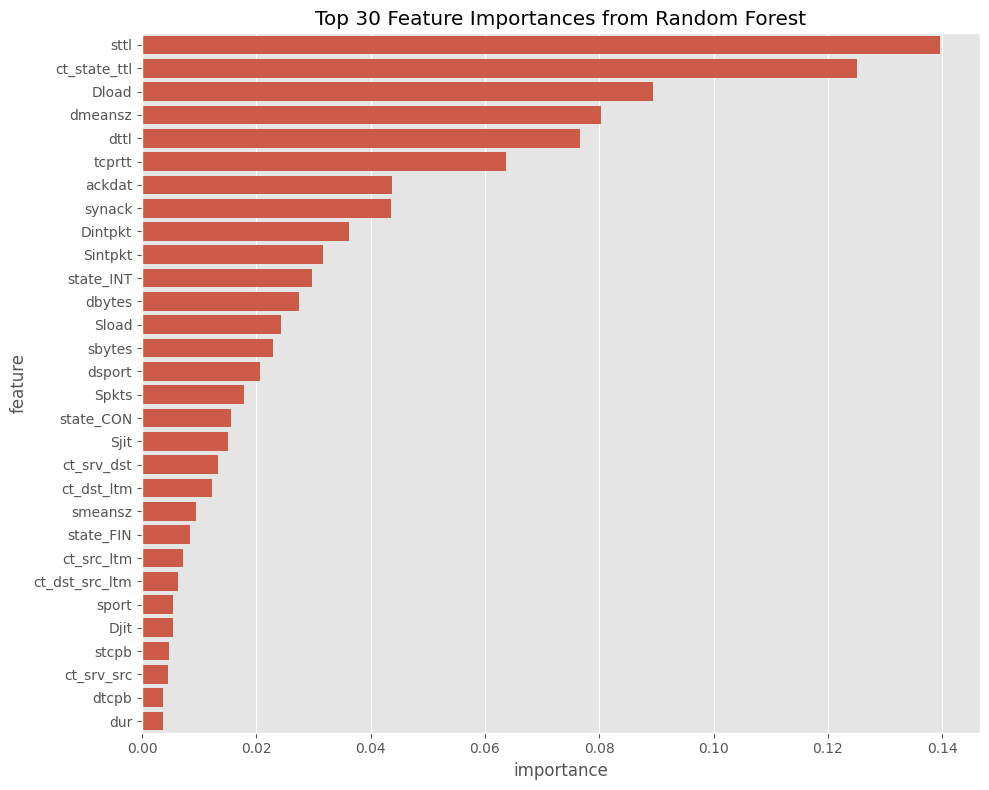

In [31]:
#Feature Importance Calculation (using Random Forest)
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np # Ensure numpy is imported

print("Calculating feature importances using Random Forest...")

# Ensure X_train_resampled is a DataFrame if it's a NumPy array
# and all_feature_names_encoded contains the correct column names from encoding step
if not isinstance(X_train_resampled, pd.DataFrame):
    # Assuming all_feature_names_encoded was defined correctly after OHE and passthrough
    X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=all_feature_names_encoded)
else:
    X_train_resampled_df = X_train_resampled

# Train a RandomForestClassifier to get feature importances
# We use the resampled training data here
rf_for_importance = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_for_importance.fit(X_train_resampled_df, y_train_resampled)

# Get feature importances
importances = rf_for_importance.feature_importances_
feature_names = X_train_resampled_df.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

print("\nTop 30 Feature Importances:")
print(feature_importance_df.head(30))

# Plot feature importances (e.g., top 30)
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(30))
plt.title('Top 30 Feature Importances from Random Forest')
plt.tight_layout()
plt.show()

 Objective
Reduce dimensionality and focus on the most impactful features identified by Random Forest's feature importance.

This helps in:

Reducing overfitting

Speeding up model training



 Why This Step is Important
Enhances efficiency by removing less important features.

Ensures that SMOTE is applied appropriately after feature selection to reflect true sample neighborhoods.

Prepares the final clean, reduced, balanced dataset that can be used to train machine learning models with potentially better performance and less noise.

In [32]:
#Select Top N Features
# Decide how many features to keep
# Current features = 198
# Half would be 198 / 2 = 99
# One-third would be 198 / 3 = 66

n_features_to_keep = 66 # Aiming for roughly half, adjust as needed

print(f"\nSelecting top {n_features_to_keep} features...")
top_n_features = feature_importance_df['feature'].head(n_features_to_keep).tolist()

print("\nSelected top N features:")
print(top_n_features)

# Subset your scaled training and test sets using these top features
X_train_selected = X_train_scaled[top_n_features] # Use X_train_scaled (before SMOTE) for consistency with X_test_scaled
X_test_selected = X_test_scaled[top_n_features]

# Re-apply SMOTE to the selected training features
# This is important because the feature selection might change which samples are "neighbors" for SMOTE
print("\nRe-applying SMOTE to the selected training features...")
smote_selected = SMOTE(random_state=42)
X_train_resampled_selected, y_train_resampled_selected = smote_selected.fit_resample(X_train_selected, y_train)


print("\nShape of X_train_resampled_selected:", X_train_resampled_selected.shape)
print("Shape of y_train_resampled_selected:", y_train_resampled_selected.shape)
print("Shape of X_test_selected:", X_test_selected.shape)
print("\nClass distribution in y_train_resampled_selected:")
print(y_train_resampled_selected.value_counts())


Selecting top 66 features...

Selected top N features:
['sttl', 'ct_state_ttl', 'Dload', 'dmeansz', 'dttl', 'tcprtt', 'ackdat', 'synack', 'Dintpkt', 'Sintpkt', 'state_INT', 'dbytes', 'Sload', 'sbytes', 'dsport', 'Spkts', 'state_CON', 'Sjit', 'ct_srv_dst', 'ct_dst_ltm', 'smeansz', 'state_FIN', 'ct_src_ltm', 'ct_dst_src_ltm', 'sport', 'Djit', 'stcpb', 'ct_srv_src', 'dtcpb', 'dur', 'res_bdy_len', 'service_-', 'proto_tcp', 'service_http', 'ct_src_dport_ltm', 'service_ftp-data', 'trans_depth', 'ct_dst_sport_ltm', 'proto_udp', 'swin', 'proto_arp', 'service_dns', 'state_REQ', 'is_sm_ips_ports', 'service_ssh', 'service_pop3', 'proto_icmp', 'service_smtp', 'proto_ospf', 'proto_sctp', 'proto_igmp', 'state_RST', 'state_ECO', 'service_ftp', 'ct_ftp_cmd', 'service_dhcp', 'proto_mobile', 'proto_sun-nd', 'service_snmp', 'state_URH', 'service_radius', 'proto_unas', 'proto_swipe', 'state_PAR', 'service_ssl', 'proto_rtp']

Re-applying SMOTE to the selected training features...

Shape of X_train_resampl

Objective
To train multiple classification models and compare their performance on the test dataset using standard evaluation metrics.

Models used:

Logistic Regression

Random Forest

(Optional) LightGBM



Output Summary
For each model:

You get a complete diagnostic view including confusion matrix, macro-averaged metrics, and ROC AUC — especially important for imbalanced classification problems.

This helps you compare models beyond just accuracy, using more robust metrics like:

F1-score: Balance between precision and recall

ROC AUC: How well the model ranks positive vs negative classes



In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# --- Define a function for model evaluation ---
def evaluate_model(name, model, X_test, y_test):
    print(f"--- Evaluating: {name} ---")
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] # For ROC AUC

    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision (macro): {precision_score(y_test, y_pred, average='macro', zero_division=0):.4f}")
    print(f"Recall (macro): {recall_score(y_test, y_pred, average='macro', zero_division=0):.4f}")
    print(f"F1-score (macro): {f1_score(y_test, y_pred, average='macro', zero_division=0):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
    print("-" * 50 + "\n")

# --- Logistic Regression ---
print("Training Logistic Regression...")
log_reg = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000) # liblinear is good for smaller datasets or binary classification
log_reg.fit(X_train_resampled_selected, y_train_resampled_selected)
evaluate_model("Logistic Regression", log_reg, X_test_selected, y_test)

# --- Random Forest ---
# You can use a different instance than the one for feature importance,
# possibly with different parameters or train it for longer.
print("Training Random Forest Classifier...")
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, class_weight='balanced_subsample')
rf_clf.fit(X_train_resampled_selected, y_train_resampled_selected)
evaluate_model("Random Forest Classifier", rf_clf, X_test_selected, y_test)

# --- Optional: Gradient Boosting (XGBoost or LightGBM if installed) ---
# Example with LightGBM (often faster for large datasets)
try:
    import lightgbm as lgb
    print("Training LightGBM Classifier...")
    lgb_clf = lgb.LGBMClassifier(random_state=42, n_jobs=-1, class_weight='balanced')
    lgb_clf.fit(X_train_resampled_selected, y_train_resampled_selected)
    evaluate_model("LightGBM Classifier", lgb_clf, X_test_selected, y_test)
except ImportError:
    print("LightGBM not installed. Skipping LightGBM model.")

Training Logistic Regression...
--- Evaluating: Logistic Regression ---
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    587932
           1       0.75      1.00      0.86     26654

    accuracy                           0.99    614586
   macro avg       0.88      0.99      0.92    614586
weighted avg       0.99      0.99      0.99    614586

Confusion Matrix:
[[579102   8830]
 [    22  26632]]
Accuracy: 0.9856
Precision (macro): 0.8755
Recall (macro): 0.9921
F1-score (macro): 0.9250
ROC AUC: 0.9980
--------------------------------------------------

Training Random Forest Classifier...
--- Evaluating: Random Forest Classifier ---
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    587932
           1       0.88      0.95      0.91     26654

    accuracy                           0.99    614586
   macro avg       0.94      0.97      0.95

 Final Output
For each model, you get:

A complete classification report

Key metrics focused on attack class detection

Useful for security, fraud detection, healthcare, etc., where false negatives are costly.



In [34]:
# ==============================================================================
# Model Training and Evaluation (Without SMOTE) + Saving Best Model as .pkl
# ==============================================================================
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score, roc_auc_score
)
import os
import joblib
import json

print("--- Starting Model Training and Evaluation on Imbalanced Data ---")

# Define a reusable function for model evaluation
def evaluate_model(name, model, X_test, y_test):
    print(f"\n--- Evaluating: {name} ---")
    start_time = pd.Timestamp.now()
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # For ROC AUC
    end_time = pd.Timestamp.now()
    
    print(f"Prediction time: {end_time - start_time}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Benign (0)', 'Attack (1)']))
    
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision (Attack): {precision_score(y_test, y_pred, pos_label=1):.4f}")
    print(f"Recall (Attack): {recall_score(y_test, y_pred, pos_label=1):.4f}")
    print(f"F1-score (Attack): {f1_score(y_test, y_pred, pos_label=1):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
    print("-" * 50)

# --- Model 1: Logistic Regression with class_weight ---
print("\nTraining Logistic Regression...")
log_reg_imbalanced = LogisticRegression(
    random_state=42,
    solver='liblinear',
    max_iter=1000,
    class_weight='balanced'
)
log_reg_imbalanced.fit(X_train_selected, y_train)
evaluate_model("Logistic Regression (Imbalanced)", log_reg_imbalanced, X_test_selected, y_test)

# --- Model 2: Random Forest Classifier with class_weight ---
print("\nTraining Random Forest Classifier...")
rf_clf_imbalanced = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)
rf_clf_imbalanced.fit(X_train_selected, y_train)
evaluate_model("Random Forest Classifier (Imbalanced)", rf_clf_imbalanced, X_test_selected, y_test)

# --- Save Best Performing Model (Random Forest Without SMOTE) ---
print("\n📦 Saving best model (Random Forest without SMOTE) and artifacts...")

# Create a directory for model artifacts
os.makedirs("model_artifacts", exist_ok=True)

# Save model
joblib.dump(rf_clf_imbalanced, "model_artifacts/rf_model_no_smote.pkl")

# Save scaler
joblib.dump(scaler, "model_artifacts/scaler.pkl")

# Save preprocessor (if applicable)
joblib.dump(preprocessor_cat, "model_artifacts/ohe_preprocessor.pkl")

# Save top features list
with open("model_artifacts/top_features.json", "w") as f:
    json.dump(top_n_features, f)

print("✅ Model and artifacts saved to 'model_artifacts/' folder.")

# --- Model 3: LightGBM Classifier with class_weight ---
print("\nTraining LightGBM Classifier...")
lgb_clf_imbalanced = lgb.LGBMClassifier(
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)
lgb_clf_imbalanced.fit(X_train_selected, y_train)
evaluate_model("LightGBM Classifier (Imbalanced)", lgb_clf_imbalanced, X_test_selected, y_test)

print("\n--- End of Evaluation ---")


--- Starting Model Training and Evaluation on Imbalanced Data ---

Training Logistic Regression...

--- Evaluating: Logistic Regression (Imbalanced) ---
Prediction time: 0 days 00:00:00.180866

Classification Report:
              precision    recall  f1-score   support

  Benign (0)       1.00      0.98      0.99    587932
  Attack (1)       0.75      1.00      0.86     26654

    accuracy                           0.99    614586
   macro avg       0.88      0.99      0.92    614586
weighted avg       0.99      0.99      0.99    614586

Confusion Matrix:
[[579096   8836]
 [    20  26634]]

Accuracy: 0.9856
Precision (Attack): 0.7509
Recall (Attack): 0.9992
F1-score (Attack): 0.8574
ROC AUC: 0.9980
--------------------------------------------------

Training Random Forest Classifier...

--- Evaluating: Random Forest Classifier (Imbalanced) ---
Prediction time: 0 days 00:00:01.816116

Classification Report:
              precision    recall  f1-score   support

  Benign (0)       1.00  

✅ What This Code Does
🔍 1. Compares Two Scenarios
With SMOTE: Models trained on balanced data.

Without SMOTE: Models trained on imbalanced data using class_weight='balanced'.

📦 2. Collects Performance Metrics
Using get_model_metrics(...), you gather:

Accuracy

Precision (focused on detecting attack class = 1)

Recall (how many attacks were correctly caught)

F1-Score

ROC AUC (good for imbalanced classification)

📊 3. Creates a Summary Table
Compiles all results into a clean DataFrame.

Columns are reordered for readability.

Sorted by Model and Method for intuitive comparison.

In [30]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# ==============================================================================
# Cell: Compare Results of Pre-Trained Models
# ==============================================================================

# --- Data structure to hold all results ---
results_list = []

# Helper function to get metrics for a pre-trained model
def get_model_metrics(model, X_test, y_test):
    """Calculates and returns a dictionary of performance metrics."""
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision (Attack)': precision_score(y_test, y_pred, pos_label=1),
        'Recall (Attack)': recall_score(y_test, y_pred, pos_label=1),
        'F1-Score (Attack)': f1_score(y_test, y_pred, pos_label=1),
        'ROC AUC': roc_auc_score(y_test, y_pred_proba)
    }
    return metrics

print("--- Collecting metrics from all trained models ---")

# --- Scenario 1: Metrics from models trained WITH SMOTE ---
# The variables X_test_selected and y_test are assumed to be available
# The models log_reg, rf_clf, lgb_clf are assumed to be trained and in memory

# Logistic Regression with SMOTE
metrics = get_model_metrics(log_reg, X_test_selected, y_test)
metrics.update({'Model': 'Logistic Regression', 'Method': 'With SMOTE'})
results_list.append(metrics)

# Random Forest with SMOTE
metrics = get_model_metrics(rf_clf, X_test_selected, y_test)
metrics.update({'Model': 'Random Forest', 'Method': 'With SMOTE'})
results_list.append(metrics)

# LightGBM with SMOTE
metrics = get_model_metrics(lgb_clf, X_test_selected, y_test)
metrics.update({'Model': 'LightGBM', 'Method': 'With SMOTE'})
results_list.append(metrics)

# --- Scenario 2: Metrics from models trained WITHOUT SMOTE (using class_weight) ---
# The models log_reg_imbalanced, rf_clf_imbalanced, lgb_clf_imbalanced are assumed to be trained and in memory

# Logistic Regression with class_weight
metrics = get_model_metrics(log_reg_imbalanced, X_test_selected, y_test)
metrics.update({'Model': 'Logistic Regression', 'Method': 'Without SMOTE'})
results_list.append(metrics)

# Random Forest with class_weight
metrics = get_model_metrics(rf_clf_imbalanced, X_test_selected, y_test)
metrics.update({'Model': 'Random Forest', 'Method': 'Without SMOTE'})
results_list.append(metrics)

# LightGBM with class_weight
metrics = get_model_metrics(lgb_clf_imbalanced, X_test_selected, y_test)
metrics.update({'Model': 'LightGBM', 'Method': 'Without SMOTE'})
results_list.append(metrics)


# ==============================================================================
# Final Comparison Table
# ==============================================================================
# Create a DataFrame from the results list for easy comparison
comparison_df = pd.DataFrame(results_list)

# Reorder columns for better readability
comparison_df = comparison_df[['Model', 'Method', 'Accuracy', 'Precision (Attack)', 'Recall (Attack)', 'F1-Score (Attack)', 'ROC AUC']]

print("\n--- Final Performance Comparison ---")
display(comparison_df.sort_values(by=['Model', 'Method']).reset_index(drop=True))

--- Collecting metrics from all trained models ---

--- Final Performance Comparison ---


,Model,Method,Accuracy,Precision (Attack),Recall (Attack),F1-Score (Attack),ROC AUC
0,LightGBM,With SMOTE,0.990514,0.844540,0.957530,0.897493,0.998990
1,LightGBM,Without SMOTE,0.985982,0.756170,0.998874,0.860741,0.999119
2,Logistic Regression,With SMOTE,0.985597,0.751001,0.999175,0.857492,0.998002
3,Logistic Regression,Without SMOTE,0.985590,0.750888,0.999250,0.857446,0.997987
4,Random Forest,With SMOTE,0.992100,0.880450,0.946350,0.912211,0.999071
5,Random Forest,Without SMOTE,0.993181,0.943845,0.896076,0.919340,0.999119
